<a href="https://colab.research.google.com/github/Anusha-jain-h-c/Data-Science-Assignment/blob/main/nn_gas_turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [3]:
data = pd.read_csv('/content/gas_turbines.csv')

In [4]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
data.shape

(15039, 11)

In [8]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [22]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [23]:
#Normalization being done.
def norm_func(i):
     x = (i-i.min())	/	(i.max()-i.min())
     return (x)

In [24]:
data1 = norm_func(data)

In [26]:
predictors = data1.drop(['TEY'],axis=1)
target = data1['TEY']

In [27]:
predictors

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [28]:
n_cols = predictors.shape[1]

In [29]:
n_cols

10

In [30]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25)

In [41]:
first_model = prep_model([10,20,1])
first_model.fit(np.array(x_train),np.array(y_train),epochs=500)
pred_train = first_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-y_train)**2))
np.corrcoef(pred_train,y_train) 

Epoch 1/500
353/353 [==============================] - 1s 1ms/step - loss: 0.0360 - accuracy: 9.3086e-05
Epoch 2/500
353/353 [==============================] - 0s 1ms/step - loss: 3.5716e-04 - accuracy: 1.7260e-04
Epoch 3/500
353/353 [==============================] - 0s 1ms/step - loss: 1.6157e-04 - accuracy: 2.8195e-04
Epoch 4/500
353/353 [==============================] - 0s 983us/step - loss: 1.3149e-04 - accuracy: 6.4304e-04
Epoch 5/500
353/353 [==============================] - 0s 1ms/step - loss: 1.2553e-04 - accuracy: 1.3596e-04
Epoch 6/500
353/353 [==============================] - 0s 1ms/step - loss: 1.2179e-04 - accuracy: 9.7671e-05
Epoch 7/500
353/353 [==============================] - 0s 1ms/step - loss: 1.3399e-04 - accuracy: 3.4732e-04
Epoch 8/500
353/353 [==============================] - 0s 1ms/step - loss: 1.2237e-04 - accuracy: 1.8264e-04
Epoch 9/500
353/353 [==============================] - 0s 1ms/step - loss: 1.3302e-04 - accuracy: 5.3437e-04
Epoch 10/500
353/353 

array([[1.        , 0.99918372],
       [0.99918372, 1.        ]])

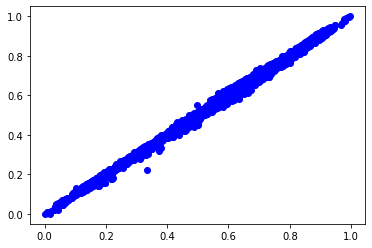

In [42]:
plt.plot(pred_train,y_train,"bo")


In [43]:
#Predicting on test data
pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
rmse_test = np.sqrt(np.mean((pred_test-y_test)**2))
np.corrcoef(pred_test,y_test)

array([[1.        , 0.99913184],
       [0.99913184, 1.        ]])

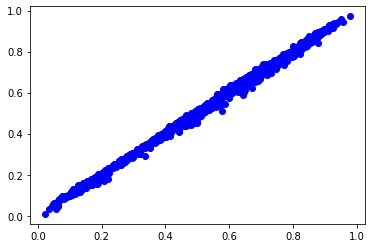

In [44]:
plt.plot(pred_test,y_test,"bo")